# **Coefficient of a Pitched Baseball**
Author: Declan Costello

Date: 7/23/2023

## **Overview**

In this analysis, I used Python to recreate ["Simplified Models for the Drag
Coefficient of a Pitched Baseball" by David Kagan & Alan M. Nathan](http://baseball.physics.illinois.edu/DragTPTMay2014.pdf) measuring the drag coefficient. I hope to provide value to the baseball community by combining my interests of weather and baseball.

## **Variables**
Descriptions taken from the Kagan and Nathan's Paper. The following is a list of the important variable to understand for this notebook.

*   **Altitude** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level. 

*   **Average Humidity** - Average Humidity is a measure of the amount of water vapor in the air throughout a day. Relative humidity is the ratio of the actual vapor pressure of water vapor to the saturation vapor pressure of water. In other words, it's how much water is in the air divided by the most water that could possibly be there. For example, if it's 97% relative humidity outside, that means the air only needs 3% more water vapor to achieve complete saturation of 100%. 

*   **Air Pressure** - Air pressure is the force exerted by air on any surface it touches. It's also known as atmospheric pressure or barometric pressure. Air pressure is caused by the weight of air molecules pressing down on the Earth. The pressure changes as you move upward from sea level into the atmosphere. The highest pressure is at sea level where the density of the air molecules is the greatest. 

*   **Air Density** - Air density is the mass of air per unit volume, or how much a certain volume of air weighs. It's denoted by the Greek letter rho, ρ. Air density depends on the temperature, pressure, and humidity of the air. Air density decreases with increasing altitude because there's less air pushing down from above and gravity is weaker farther from Earth's center.

*   **Drag Length** - Drag is a force exerted by a fluid stream on an object moving through it or on any obstacle in its path. Drag can also be called fluid resistance. 

*   **Drag Coefficient** - The drag coefficient, or CD, is a dimensionless quantity that quantifies the drag or resistance of an object in a fluid environment, such as air or water. It's a value that demonstrates how streamlined an object is and how much it is affected by drag. The lower the value, the lower the effects of drag will be on that object. 


# **Installation**

The following installs the necessary packages.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

# **Drag Length Equation (6)**

Given Weight of a Baseball, Circumference of a Baseball, and Air Density




$$\delta = \frac{8\  \pi\ W}
{P_{e}\ c^2} $$

In [2]:
def Drag_Length_Equation(Weight_lbs, Circumference, Air_Density_lbsft3):
    return (8*np.pi*Weight_lbs)/(Air_Density_lbsft3*np.square(Circumference))

In [3]:
Weight_lbs         = 0.32   # Baseball Weight in lbs
Circumference      = 0.76   # Baseball Circumference in feet
Air_Density_lbsft3 = 0.0747 # lb/ft^3 Air Density

s = Drag_Length_Equation(Weight_lbs, Circumference, Air_Density_lbsft3)
s # Drag_Length

186.39834483802875

# **Drag Coefficient Equation (3)**

Given Drag Length, ay, and v0y

$$ C_{d} =  \delta \frac{a_{y}}
{v0_{y}^2} $$

In [4]:
def Drag_CoeF(s, v0y, ay):
    return (s * (ay/np.square(v0y)))

**Initial Position**

$$ r_{0} =  (-1.566ft)\hat{x} + (50.000ft)\hat{y} + (5.780ft)\hat{z} $$

In [5]:
r0x =  -1.566
r0y =  50.000
r0z =   5.780

**Initial velocity**

$$ v_{0} =  (2.631 \frac{ft}{s})\hat{x} + (-122.644\frac{ft}{s})\hat{y} + (-3.435\frac{ft}{s})\hat{z} $$

In [6]:
v0x =    2.631
v0y = -122.644
v0z =   -3.435

**Acceleration Vector**

$$ a =  (-6.387 \frac{ft}{s^2})\hat{x} + (25.067\frac{ft}{s^2})\hat{y} + (-21.810\frac{ft}{s^2})\hat{z} $$

In [7]:
ax =  -6.387
ay =  25.067
az = -21.810

In [8]:
Weight_lbs         = 0.32   # Baseball Weight in lbs
Circumference      = 0.76   # Baseball Circumference in feet
Air_Density_lbsft3 = 0.0747 # Air Density in lb/ft^3 

s = Drag_Length_Equation(Weight_lbs, Circumference, Air_Density_lbsft3)

cd = Drag_CoeF(s, v0y, ay)
cd # Drag Coefficient

0.3106360103464578

## **Analysis**

What happen to cd as Circumference of a baseball, Weight of a baseball and Air_Density_lbsft3 fluctuate?

**Fluctuating Circumference**

<Axes: xlabel='Circumference', ylabel='cd'>

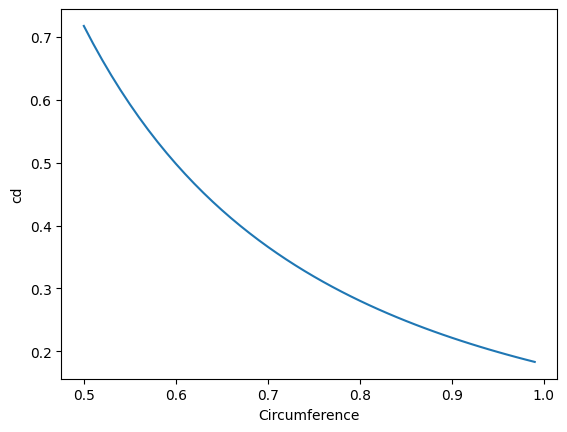

In [72]:
Weight_lbs             = 0.32                                          # Baseball Weight in lbs
list_of_circumferences = [round(x * 0.01, 2) for x in range(50,100)]   # Baseball Circumference in feet
Air_Density_lbsft3     = 0.0747                                        # Air Density in lb/ft^3 

new_s_list = []

for i in list_of_circumferences:
    new_s_list.append(Drag_Length_Equation(Weight_lbs, i, Air_Density_lbsft3))

new_cd_list = []

for s in new_s_list:
    new_cd_list.append(Drag_CoeF(s, v0y, ay))

fluct_circumferences = pd.DataFrame(np.column_stack([list_of_circumferences, new_s_list, new_cd_list]),
                                    columns = ['Circumference', 'Drag_Length', 'cd'])
fluct_circumferences['Weight_lbs'] = 0.32
fluct_circumferences['Air_Density_lbsft3'] = 0.0747

sns.lineplot(data = fluct_circumferences, x='Circumference', y='cd')

**Fluctuating Weight**

<Axes: xlabel='Weight', ylabel='cd'>

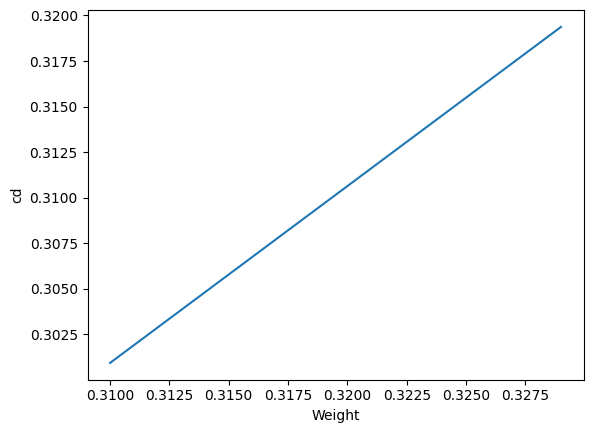

In [71]:
Weight_lbs_list        = [round(x * 0.001, 3) for x in range(310,330)] # Baseball Weight in lbs
Circumference          = 0.76                                      # Baseball Circumference in feet
Air_Density_lbsft3     = 0.0747                                    # Air Density in lb/ft^3 

new_s_list = []

for i in Weight_lbs_list:
    new_s_list.append(Drag_Length_Equation(i, Circumference, Air_Density_lbsft3))

new_cd_list = []

for s in new_s_list:
    new_cd_list.append(Drag_CoeF(s, v0y, ay))

fluct_circumferences = pd.DataFrame(np.column_stack([Weight_lbs_list, new_s_list, new_cd_list]),
                                    columns = ['Weight', 'Drag_Length', 'cd'])
fluct_circumferences['Circumference'] = 0.76
fluct_circumferences['Air_Density_lbsft3'] = 0.0747

sns.lineplot(data = fluct_circumferences, x='Weight', y='cd')

**Fluctuating Air Density**

<Axes: xlabel='Air Density', ylabel='cd'>

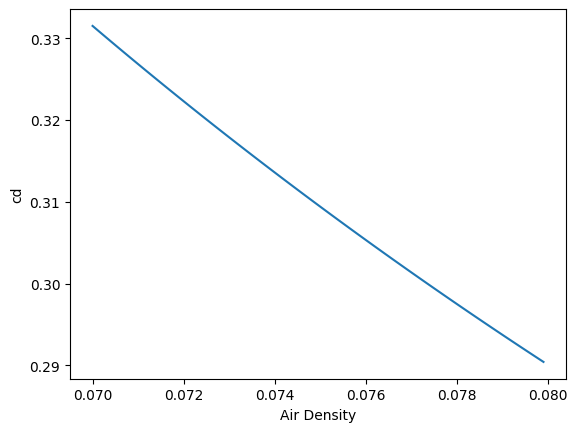

In [73]:
Weight_lbs              = 0.32                                        # Baseball Weight in lbs
Circumference           = 0.76                                        # Baseball Circumference in feet
Air_Density_lbsft3_list = [round(x * 0.0001, 4) for x in range(700,800)] # Air Density in lb/ft^3 

new_s_list = []

for i in Air_Density_lbsft3_list:
    new_s_list.append(Drag_Length_Equation(Weight_lbs, Circumference, i))

new_cd_list = []

for s in new_s_list:
    new_cd_list.append(Drag_CoeF(s, v0y, ay))

fluct_circumferences = pd.DataFrame(np.column_stack([Air_Density_lbsft3_list, new_s_list, new_cd_list]),
                                    columns = ['Air Density', 'Drag_Length', 'cd'])
fluct_circumferences['Weight_lbs'] = 0.32
fluct_circumferences['Circumference'] = 0.76

sns.lineplot(data = fluct_circumferences, x='Air Density', y='cd')

## **Future Analysis**

In the future, I plan to use temperature, average humidity, and altitude to [calucalte a more accurate air density](https://www.engineersedge.com/calculators/air-density.htm) using [live weather data](https://barometricpressure.app/denver). Will be on the lookout to see if [seam height data](http://baseball.physics.illinois.edu/HRReport2019.pdf) is ever available as well.

In [ ]:
# custom_air_density(95F, 35% humidity, 5184 ft) = 0.058 lb/f

# custom_air_density(48F, 35% humidity, 63 ft)   = 0.077 lb/ft3